MovieWriter ffmpeg unavailable; using Pillow instead.


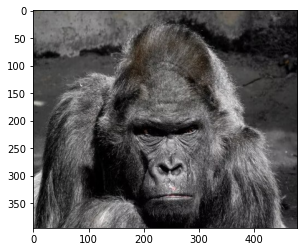

In [1]:
# 水平移動
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cv2

# 一つのsubplotを作る。それはfigureとaxesとから成る
fig, ax = plt.subplots()

# JPEG画像ファイルを読み込む
image = cv2.imread("gorilla.jpg")[:,:,::-1]

# 画像を水平に移動する関数（画像を返す）
# image : 画像
# shift : 画像をX軸方向にシフトする幅、単位はピクセル. Eg: 20 : X軸方向に20ピクセルだけ移動する
def shift_x(image, shift):
    h, w = image.shape[:2]
    src = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0]], np.float32)
    dest = src.copy()
    dest[:,0] += shift
    # 変換行列を導き出す
    transformation_matrix = cv2.getAffineTransform(src, dest)
    # 画像に対して変換行列を適用する
    dst = cv2.warpAffine(image, transformation_matrix, (w, h))
    return dst # 変換された結果としての画像を返す

# frameを描画する関数
def update(x):
    transformed = shift_x(image, x)
    plt.imshow(transformed)

# animate関数をcallしてアニメーションを描画する
animation = FuncAnimation(fig, update, 
    frames=np.append(np.arange(0,200,20), np.arange(200, 0, -20)), interval=100)


# GIFファイルに保存する
animation.save("shiftX.gif")
